# **Práctica Final Reconocimiento de Formas**

* **Alumno 1**: Bolinches Segovia, Jorge
* **Alumno 2**: Cerezo Pomykol, Jan

**Nota**: El alumno *Cercadillo Muñoz, Daniel*, que figura en las anteriores entregas, sin haber participado en la elaboración de ninguna de ellas, nos ha confirmado oficialmente que ha abandonado la asignatura, por tanto no consta como autor en esta práctica. 


# **Introducción**

Este notebook de Jupyter contiene las soluciones propuestas a los apartados del enunciado de la práctica correspondiente a la primera parte de la asignatura. Incluye tanto la implementación de los clasificadores como las pruebas realizadas con estos. A continuación se explica el procedimiento seguido para implementar cada clasificador, así como los métodos de reducción de la dimensionalidad vistos en clase:

***

**Clasificador distancia euclídea:**
El entrenamiento de este clasificador consiste en calcular los centroides $z_{i}$ de cada clase. Esto es lo que hace la función `fit` del clasificador.

$$z_{i} = \frac{1}{card(\alpha_{i})}\sum\limits _{\forall x\in\alpha_{i}}x$$

La predicción consiste en calcular la distancia euclídea de cada vector de entrada a los centroides de cada clase y elegir la clase que se corresponde con la menor distancia euclídea asociada. El cálculo de pertenencia se hace con `decision_function`. La función de pertenencia es la siguiente:

$$ de_{i}(x) \equiv D_{E}(x, z_{i}) = \sqrt{\sum\limits_{j=0}^{n}(x_{j}-z_{i})^{2}}$$

Donde $D_{E}(x, z_{i})$ es la distancia eculídea de $x$ al centroide $z_{i}$ y $j$ es la dimensión de cada dato. Dado que esta función proporciona la distancia a una clase, se selecciona el valor mínimo. Se asigna el elemento $x$ a la clase $\alpha_{i}$ si:

$$ i = \arg_{\min_{j}}\{de_{i}(x)\} $$

Esta operación se ejecuta en la función `predict`.

***

**Clasificador estadístico bayesiano:** Este clasificador parte de la hipótesis de distribución gaussiana. La función de pertenencia del clasificador es la siguiente:

$$ db_{i}(x) = -\frac{1}{2}ln(|\Sigma_{i}|)-\frac{1}{2}(x-\mu_{i})^{T}\Sigma_{i}^{-1}(x-\mu_{i})+\ln P(\alpha_{i})$$

Donde $\Sigma_{i}$ es la matriz de covarianza de la clase $\alpha_{i}$, $P(\alpha_{i})$ es la probabilidad a priori de la clase $\alpha_{i}$, y $\mu_{i}$ es la media de la clase $\alpha_{i}$. Dado que esta función proporciona una probabilidad de pertenencia a una clase, se selecciona el valor máximo. Se asigna el elemento $x$ a la clase $\alpha_{i}$ si:

$$ i = \arg_{\max_{j}}\{db_{i}(x)\} $$

En la implementación se emplea $dbq_{i} = \ln(db_{i}(x))$, que tiene forma cuadrática:

$$ dbq_{i}(x) = x^{T}[-\frac{1}{2}\Sigma_{i}^{-1}]x + [\mu_{i}^{T}\Sigma_{i}^{-1}]x -\frac{1}{2}\mu_{i}^{T}\Sigma_{i}^{-1}\mu_{i} -\frac{1}{2}\ln|\Sigma_{i}| + \ln P(\alpha_{i})$$

En la implementación, los términos $a$, $b$ y $c$ de la expresión cuadrática $ax^{2}+bx+c$ se corresponden con:

$$a = -\frac{1}{2}\Sigma_{i}^{-1}$$

$$b = \mu_{i}^{T}\Sigma_{i}^{-1}$$

$$c = -\frac{1}{2}\mu_{i}^{T}\Sigma_{i}^{-1}\mu_{i} -\frac{1}{2}\ln|\Sigma_{i}| + \ln P(\alpha_{i})$$

Estos términos se calculan en el entrenamiento del clasificador, dado que son independientes del vector $x$ de entrada a la hora de clasificar. En la función clasificadora, se calcula $dbq_{i}(x)$.

El clasificador regularizado añade dos hiperparámetros en el cálculo de $db_{i}(x)$: $\lambda$ y $\gamma$. El primero indica una medida de similitud entre clases, mientras que el segundo sirve para regularizar la matriz de covarianzas. Primero se calcula la matriz $\Sigma_{i}^{\lambda}$:

$$\Sigma_{i}^{\lambda} = \frac{(1-\lambda)n_{i}\Sigma_{i} + \lambda nS_{w}}{(1-\lambda)n_{i} + \lambda n}$$

Donde $n_{i}$ es el número de representantes de la clase $i$, $n$ es el número total de representantes, y $S_{w}$ es la matriz

$$S_{w} = \sum\limits_{i=0}^{n_{c}}\frac{n_{i}}{n}\Sigma_{i}$$

donde $n_{c}$ es el número de clases.

A continuación se calcula la matriz $\Sigma_{i}^{\lambda, \gamma}$:

$$\Sigma_{i}^{\lambda, \gamma} = (1-\lambda)\Sigma_{i}^{\lambda} + \gamma c_{i} I_{d}$$

Donde $I_{d}$ es la matriz identidad $d x d$, $d$ la dimensión de cada representante y $c_{i}$ es:

$$c_{i} = \frac{Tr\{\Sigma_{i}^{\lambda}\}}{d}$$

Con la nueva matriz de covarianzas $\Sigma_{i}^{\lambda, \gamma}$ se calcula $dbrq_{i}(x)$: 

$$ dbrq_{i}(x) = x^{T}[-\frac{1}{2}\Sigma_{i}^{\lambda, \gamma -1}]x + [\mu_{i}^{T}\Sigma_{i}^{\lambda, \gamma -1}]x -\frac{1}{2}\mu_{i}^{T}\Sigma_{i}^{\lambda, \gamma -1}\mu_{i} -\frac{1}{2}\ln|\Sigma_{i}^{\lambda, \gamma}| + \ln P(\alpha_{i})$$

**NOTA**: Se incluyen las implemetanciones de los siguientes clasificadores:
* **Clasificador de la distancia euclídea**: implementado con la función $de_{i}(x)$. Está disponible en la clase *ClassifEuclid.*
* **Clasificador estadístico sin regularizar:** implementado con la función $dbq_{i}(x)$. Está disponible en la clase *ClassifEstadistico*
* **Clasificador estadístico regularizado:** implementado con la función $dbrq_{i}(x)$. Está disponible en la clase *ClassifEstadisticoRegularizado_metodo_clase*
* **Clasificador estadístico regularizado (método de sklearn):** implementado con regularización por autovectores. Está disponible en la clase *ClassifEstadisticoRegularizado_metodo_sklearn*

***

**Análisis de Componentes Principales:** Este método tiene como objetivo eliminar características no discriminantes de un conjunto de datos, de forma que se conserva la mayoría de la información necesaria para la decisión, eliminando un número considerable de información poco relevante. Esta técnica se puede emplear en múltiples campos, pero detallaremos el procedimiento para esta práctica.

Partiendo de un conjunto de datos $X$ que contiene dimensiones que no aportan información dado que la varianza de esa dimensión es muy pequeña, el Análisis de Componentes Principales consiste en escoger las componentes asociadas a las varianzas más altas de cada una de las dimensiones. Dicho de otra forma, es un método de selección de componentes que maximiza la varianza dentro de cada clase.

1. El primer paso consiste en calcular la media del vector $X$ de datos.

$$\bar X = \frac{1}{m}\sum\limits_{i=1}^{m}X_{i}$$

2. El segundo paso consiste en estandarizar el conjunto de datos. Para ello se resta al vector $X$ su media $\bar X$.

$$\hat X = X - \bar X$$

3. Se calcula la matriz de covarianzas $\Sigma_{\hat X}$ de $\hat X$.

4. Se calcula la descomposición espectral de la matriz $\Sigma_{\hat X}$. Los autovalores ordenados de mayor a menor, proporcionan los autovectores correspondientes a las direcciones de máxima varianza del conjunto de datos. En este punto es posible entender por qué es importante estandarizar los datos (paso 2), veamos un ejemplo. Supongamos que queremos clasificar personas según su salario anual y el número de días que trabajan al año.Supongamos que en una variable medimos el salario anual de las personas, y en otra el número de días que se trabaja al año. En este caso el salario estará en el rango de las decenas de miles, mientras que el número de días nunca será superior a 365. Si los sueldos de nuestro conjunto de datos varían entre 9.000€ hasta 40.000€ (por ejemplo), y los días varían entre 100 y 300 días, se ve claramente que el autovector asociado al autovalor mayor es el de los salarios. El objetivo del Análisis de Componentes Principales es reducir el conjunto de datos sin perder demasiada información. En este ejemplo, el salario es la variable que tiene mayor varianza. Pero podría darse el caso de que no es la variable más importante para el problema que queremos resolver, por tanto sería incorrecto seleccionar el autovector asociado. Es por esto por lo que es necesario estandarizar los datos. (?)

$$\Sigma_{\hat X} = P\Lambda P^{T}$$

5. Se construye la matriz de proyección $A$, compuesta por los $k$ autovectores de mayor autovalor asociado ($P_{1-k}$). El valor de $k$ es un hiperparámetro, indica el número de componentes que se conservarán.

$$A = P_{1-k}$$

6. Se proyectan los datos estandarizados sobre el nuevo espacio:

$$X_{pr} = A^{T}\hat X$$

Con el conjunto de datos $X_{pr}$ se entrena el clasificador. Cuando se quiere evaluar, es necesario estandarizar los datos del test y proyectarlos sobre el mismo espacio:

$$X_{pr} = A^{T}(X-\bar X)$$

***

**Análisis Discriminante Lineal:** Este método, al igual que el Análisis de Componentes Principales, consiste en reducir la dimensionalidad de un conjunto de datos. Tiene como objetivo maximizar la separación entre las clases, pero minimizando la varianza dentro de cada clase, es decir, maximiza el Ratio de Fisher. Esta técnica también se puede emplear en múltiples campos, pero detallaremos el procedimiento seguido en esta práctica.

1. Primero hay que calcular la matrix $S_{w}$, que representa la suma de las dispersiones de cada clase ($\Sigma_{i}$).

$$S_{w} = \sum\limits_{i=0}^{c}\Sigma_{i}$$

2. Se calcula la matriz de dispersión entre clases $S_{b}$:

$$S_{b} = \sum\limits_{i=0}^{c}N_{i}(x_{i}-\bar x)(x_{i}-\bar x)^{T}$$

Donde $N_{i}$ representa el número de datos de la clase $i$ y $\bar x$ la media total. Lo que pretende este método es minimizar $S_{w}$ y maximizar $S_{b}$.

Esta matriz se puede calcular también construyendo una matrix de filas $m$, donde la fila $i$ se corresponde con el vector de medias de la clase $i$. Luego se calcula la matriz de covarianzas de la matrix $m$ y se multiplica por el número de elementos de cada clase ($N_{i}$). ?????

3. Calcular la descomposición espectral de $S_{w}^{-1}S_{b}$:

$$S_{w}^{-1}S_{b} = P\Lambda P^{T}$$

Previamente a este paso, lo que se quería era minimizar $S_{w}$ y maximizar $S_{b}$, pero l invertir la matriz $S_{w}$, ahora lo que se quiere es maximizar. Los autovectores asociados a los autovalores de mayor valor de esta descomposición espectral nos proporcionan las direcciones en las que hay maxima varianza de $S_{b}$ y máxima varianza de $S_{w}^{-1}$ (que es equivalente a buscar la mínima varianza de $S_{w}$.

4. 




Este método asigna el dato $x$ a la clase que minimize la distancia de Mahalanobis, teniendo en cuenta además la probabilidad a priori de cada clase.


# **Implementación de clasificadores**

In [8]:
import numpy as np
from abc import abstractmethod
from sklearn.base import BaseEstimator
from time import time

class Classifier(BaseEstimator):

    @abstractmethod
    def fit(self, X, y):
        pass

    @abstractmethod
    def decision_function(self, X):
        pass
    
    @abstractmethod
    def predict(self, X):
        pass
    
    def score(self, X, y):
        return self.num_aciertos(X, y) / len(y)


#### **Clasificador de la distancia euclídea**

In [9]:
class ClassifEuclid(Classifier, BaseEstimator):
    
    def __init__(self, labels=[]):
        """Constructor de la clase
        labels: lista de etiquetas de esta clase (argumento necesario)"""
        self.labels = labels
        self.Z = None # Array de centroides

    def fit(self, X, y):
        """Entrena el clasificador
        X: matriz numpy cada fila es un dato, cada columna una medida
        y: vector de etiquetas, tantos elementos como filas en X
        retorna objeto clasificador"""
        n = np.zeros(len(self.labels)) # Contador de ocurrencias de cada clase
        self.Z = np.zeros((len(self.labels), X.shape[1]))
        # Calcular la media: 
        # Sumar las ocurrencias de cada clase en self.Z
        for yi, Xi in zip(y, X):
            n[yi] = n[yi] + 1
            self.Z[yi] = self.Z[yi] + Xi
        # Dividir cada sumatorio entre el númeo de ocurrencias
        self.Z = self.Z / n[:, None]
        return self

    def decision_function(self, X):
        """Estima el grado de pertenencia de cada dato a todas las clases 
        X: matriz numpy cada fila es un dato, cada columna una medida del vector de caracteristicas. 
        Retorna una matriz, con tantas filas como datos y tantas columnas como clases tenga
        el problema, cada fila almacena los valores pertenencia de un dato a cada clase"""
        # Calcular la distancia de cada fila a cada centroide
        aux = X[:,None]-self.Z
        return np.sqrt(np.einsum('abc,abc->ab', aux, aux))

    def predict(self, X):
        """Estima la etiqueta de cada dato. La etiqueta puede ser un entero o bien un string.
        X: matriz numpy cada fila es un dato, cada columna una medida
        retorna un vector con las etiquetas de cada dato"""
        # Devuelve un array con el índice con valor mínimo de cada fila.
        # Cada índice se corresponde con la clase a la que pertenece.
        return np.argmin(self.decision_function(X), axis=1)
    
    def num_aciertos(self, X, y):
        """Cuenta el numero de aciertos del clasificador para un conjunto de datos X.
        X: matriz de datos a clasificar
        y: vector de etiquetas correctas"""
        # Contar el número de datos iguales en ambos vectores
        return np.sum(self.predict(X)==y)


#### **Clasificador estadístico bayesiano**

In [10]:
class ClassifEstadistico(Classifier, BaseEstimator):
    
    def __init__(self, labels=[]):
        """Constructor de la clase
        labels: lista de etiquetas de esta clase (argumento necesario)"""
        self.labels = labels
        self.mu = None # Array de medias
        self.cov = None # Array de matrices de covarianza de cada clase
        self.cov_inv = None # Array de matrices de covarianza inversas
        self.det = None # Array de determinantes de las matrices de covarianza
        # Terminos de la expresión cuadrática del clasificador
        self.a = None
        self.b = None
        self.c = None

    def fit(self,X,y):
        """Entrena el clasificador
        X: matriz numpy cada fila es un dato, cada columna una medida
        y: vector de etiquetas, tantos elementos como filas en X
        retorna objeto clasificador"""
        n_labels = len(self.labels)
        n_caracteristicas = X.shape[1]
        self.mu = np.empty((n_labels, n_caracteristicas))
        self.cov = np.empty((n_labels, n_caracteristicas, n_caracteristicas))
        self.cov_inv = np.empty((n_labels, n_caracteristicas, n_caracteristicas))
        self.det = np.empty(n_labels)
        self.a = np.empty((n_labels, n_caracteristicas, n_caracteristicas))
        self.b = np.empty((n_labels, n_caracteristicas))
        self.c = np.empty(n_labels)
        for c in range(len(self.labels)):
            X_clase = X[y==c]
            self.cov[c] = np.cov(X_clase, rowvar=False)
            self.mu[c] = np.mean(X_clase, axis=0)
            self.cov_inv[c] = np.linalg.inv(self.cov[c])
            self.det[c] = np.linalg.det(self.cov[c])
            self.a[c] = -.5 * self.cov_inv[c]
            self.b[c] = self.mu[c].T @ self.cov_inv[c]
            self.c[c] = -.5 * (self.mu[c].T @ self.cov_inv[c] @ self.mu[c]) -.5 * np.log(self.det[c]) + np.log(X_clase.shape[0] / X.shape[0])
        return self

    def decision_function(self,X):
        """Estima el grado de pertenencia de cada dato a todas las clases 
        X: matriz numpy cada fila es un dato, cada columna una medida del vector de caracteristicas. 
        Retorna una matriz, con tantas filas como datos y tantas columnas como clases tenga
        el problema, cada fila almacena los valores pertenencia de un dato a cada clase"""
        return np.einsum('ab,cdb,ad->ac', X, self.a, X) + np.einsum('ab,cb->ca', self.b, X) + self.c[None,:]

    def predict(self,X):
        """Estima la etiqueta de cada dato. La etiqueta puede ser un entero o bien un string.
        X: matriz numpy cada fila es un dato, cada columna una medida
        retorna un vector con las etiquetas de cada dato"""
        return np.argmax(self.decision_function(X), axis=1)
    
    def num_aciertos(self,X,y):
        """Cuenta el numero de aciertos del clasificador para un conjunto de datos X.
        X: matriz de datos a clasificar
        y: vector de etiquetas correctas"""
        return np.sum(self.predict(X)==y)


#### **Clasificador estadístico bayesiano regularizado (método visto en clase, explicado en la introducción)**

In [11]:
class ClassifEstadisticoRegularizado_metodo_clase(Classifier, BaseEstimator):
    
    def __init__(self, labels=[]):
        """Constructor de la clase
        labels: lista de etiquetas de esta clase (argumento necesario)"""
        self.labels = labels
        self.mu = None # Array de medias
        self.cov = None # Array de matrices de covarianza de cada clase
        self.cov_reg = None # Array de matrices de covarianza regularizadas
        self.cov_reg_inv = None # Array de matrices de covarianza inversas
        self.det = None # Array de determinantes de las matrices de covarianza
        self.dont_ignore = [] # dimensiones a NO ignorar si cov se puede invertir
        self.priori = None
        # Terminos de la expresión cuadrática del clasificador
        self.a = None
        self.b = None
        self.c = None

    def fit(self, X, y, l=0, g=0):
        """Entrena el clasificador
        X: matriz numpy cada fila es un dato, cada columna una medida
        y: vector de etiquetas, tantos elementos como filas en X
        l: (lambda) hiperparámetro de similitud entre matrices de covarianza (ver introduccion)
        g: (gamma) hiperparámetro de regularización (ver introduccion)
        retorna objeto clasificador"""
        n_labels = len(self.labels)
        n_caracteristicas = X.shape[1]
        self.mu = np.empty((n_labels, n_caracteristicas))
        self.cov = np.empty((n_labels, n_caracteristicas, n_caracteristicas))
        self.cov_lg = np.empty((n_labels, n_caracteristicas, n_caracteristicas))
        self.cov_lg_inv = np.empty((n_labels, n_caracteristicas, n_caracteristicas))
        self.det = np.empty(n_labels)
        self.priori = np.empty(n_labels)
        cov_pooled = np.zeros((n_caracteristicas, n_caracteristicas))
        self.a = np.empty((n_labels, n_caracteristicas, n_caracteristicas))
        self.b = np.empty((n_labels, n_caracteristicas))
        self.c = np.empty(n_labels)
        for c in range(len(self.labels)):
            X_clase = X[y==c]
            self.cov[c] = np.cov(X_clase, rowvar=False)
            cov_pooled = cov_pooled + ((X_clase.shape[0] / X.shape[0]) * self.cov[c])  # Matriz Sw en el libro de Webb (formula 2.15, pagina 42)
        for c in range(len(self.labels)):
            X_clase = X[y==c]
            self.mu[c] = np.mean(X_clase, axis=0)
            cov_l = (((1 - l) * X_clase.shape[0] * self.cov[c]) + (l * X.shape[0] * cov_pooled)) / ((1 - l) * X_clase.shape[0] + l * X.shape[0])
            self.cov_lg[c] = (1 - g) * cov_l + g * (np.trace(cov_l) / n_caracteristicas) * np.eye(n_caracteristicas)
            self.det[c] = np.linalg.det(self.cov_lg[c])
            if self.det[c] != 0:
                self.cov_lg_inv[c] = np.linalg.inv(self.cov_lg[c])
                self.det[c] = np.linalg.det(self.cov_lg[c])
                self.priori = X_clase.shape[0] / X.shape[0]
                self.dont_ignore.append(c)
                self.a[c] = -.5 * self.cov_lg_inv[c]
                self.b[c] = self.mu[c].T @ self.cov_lg_inv[c]
                self.c[c] = -.5 * (self.mu[c].T @ self.cov_lg_inv[c] @ self.mu[c]) -.5 * np.log(self.det[c]) + np.log(X_clase.shape[0] / X.shape[0])
        return self

    def decision_function(self,X):
        """Estima el grado de pertenencia de cada dato a todas las clases 
        X: matriz numpy cada fila es un dato, cada columna una medida del vector de caracteristicas. 
        Retorna una matriz, con tantas filas como datos y tantas columnas como clases tenga
        el problema, cada fila almacena los valores pertenencia de un dato a cada clase"""
        res = np.zeros((X.shape[0], len(self.labels)))
        for c in self.dont_ignore:
            #res[:,c] = -.5 * np.log(self.det[c]) - .5 * np.diagonal((X - self.mu[c]) @ self.cov_lg_inv[c] @ (X - self.mu[c]).T) + np.log(self.priori)
            res[:,c] = np.einsum('ab,db,ad->a', X, self.a[c], X) + np.einsum('b,cb->c', self.b[c], X) + self.c[c]
        return res
        #return np.einsum('ab,cdb,ad->ac', X, self.a, X) + np.einsum('ab,cb->ca', self.b, X) + self.c[None,:]

    def predict(self,X):
        """Estima la etiqueta de cada dato. La etiqueta puede ser un entero o bien un string.
        X: matriz numpy cada fila es un dato, cada columna una medida
        retorna un vector con las etiquetas de cada dato"""
        return np.argmax(self.decision_function(X), axis=1)
    
    def num_aciertos(self,X,y):
        """Cuenta el numero de aciertos del clasificador para un conjunto de datos X.
        X: matriz de datos a clasificar
        y: vector de etiquetas correctas"""
        return np.sum(self.predict(X)==y)


#### **Clasificador estadístico bayesiano regularizado por autovectores (método de sklearn)**

In [12]:
class ClassifEstadisticoRegularizado_metodo_sklearn(Classifier, BaseEstimator):
    
    def __init__(self, labels=[]):
        self.labels = labels
        self.reg_param = 0 # hiperparametro
        self.mu = None # Array de medias
        self.cov = None # Array de matrices de covarianza de cada clase
        self.prob_clases = None
        self.ajustes = []
        self.autovectores = []
    
    def fit(self, X, y, reg_param=0):
        self.reg_param = reg_param
        n_labels = len(self.labels)
        n_caracteristicas = X.shape[1]
        self.mu = np.empty((n_labels, n_caracteristicas))
        self.cov = np.empty((n_labels, n_caracteristicas, n_caracteristicas))
        self.prob_clases = np.empty(n_labels)
        for c in range(len(self.labels)):
            X_clase = X[y==c, :]
            self.mu[c] = np.mean(X_clase, axis=0)
            X_new = X_clase - self.mu[c]
            # descomposicion espectral
            _, autovalores, autovectores = np.linalg.svd(X_new, full_matrices=False)
            ajuste = (autovalores ** 2) / (X_new.shape[0] - 1)
            ajuste = ((1 - self.reg_param) * ajuste) + self.reg_param
            self.cov[c] = (ajuste * autovectores.T) @ autovectores # np.dot(ajuste * autovectores.T, autovectores)
            self.ajustes.append(np.copy(ajuste))
            self.autovectores.append(np.copy(autovectores))
            self.prob_clases[c] = X_clase.shape[0] / X.shape[0]
        return self

    def decision_function(self,X):
        """Estima el grado de pertenencia de cada dato a todas las clases 
        X: matriz numpy cada fila es un dato, cada columna una medida del vector de caracteristicas. 
        Retorna una matriz, con tantas filas como datos y tantas columnas como clases tenga
        el problema, cada fila almacena los valores pertenencia de un dato a cada clase"""
        res = np.empty((X.shape[0], len(self.labels)))
        for c in range(len(self.labels)):
            res[:,c] = np.sum(((X - self.mu[c]) @ (self.autovectores[c] * (self.ajustes[c] ** -.5)[:, None]).T) ** 2, axis=1)
        aux = np.asarray([np.sum(np.log(x)) for x in self.ajustes])
        return (-.5 * (res.T + aux[:, None]) + np.log(self.prob_clases)[:, None]).T
    
    def predict(self,X):
        """Estima la etiqueta de cada dato. La etiqueta puede ser un entero o bien un string.
        X: matriz numpy cada fila es un dato, cada columna una medida
        retorna un vector con las etiquetas de cada dato"""
        return np.argmax(self.decision_function(X), axis=1)
    
    def num_aciertos(self,X,y):
        """Cuenta el numero de aciertos del clasificador para un conjunto de datos X.
        X: matriz de datos a clasificar
        y: vector de etiquetas correctas"""
        return np.sum(self.predict(X)==y)


#### **Clase Splitter para GridSearchCV**

In [ ]:
class ExclusionSplitter:
    """Esta clase nos permite usar GridSearchCV con la valuación por exclusion."""
    def __init__(self, train_indices, test_indices):
        self.train_indices = train_indices
        self.test_indices = test_indices

    def split(self, X, y=None, groups=None):
        return [(self.train_indices, self.test_indices)]

    def get_n_splits(self, X=None, y=None, groups=None):
        return 1


#### **Implemetación de Cross Validation con KFolds**
Esta implementación funciona, pero no debe usarse. No siempre ofrece los mismos resultados porque el array de entrada se baraja de forma aleatoria.

In [ ]:
def cv_score(clsf, X, y, cv):
    permutation = np.random.permutation(X.shape[0])
    X_chunks = np.array_split(X[permutation], cv)
    y_chunks = np.array_split(y[permutation], cv)
    scores = np.empty(cv)
    for i in range(cv):
        X_test = X_chunks[i]
        y_test = y_chunks[i]
        X_train_chunks = X_chunks[:i] + X_chunks[i+1:]
        y_train_chunks = y_chunks[:i] + y_chunks[i+1:]
        X_train = np.vstack(X_train_chunks)
        y_train = np.hstack(y_train_chunks)
        clsf.fit(X_train, y_train)
        scores[i] = clsf.score(X_test, y_test)
    return scores


#### **Implemetación de Cross Validation con Stratified KFolds**
Esta implementación funciona, pero no debe usarse. No es una implementación eficiente.

In [ ]:
from sklearn.model_selection import StratifiedKFold
def cv_score_skf(clsf, X, y, cv, reg_param=0):
    skf = StratifiedKFold(n_splits=cv)
    i = 0
    for train_i, test_i in skf.split(X, y):
        X_train = X[train_i]
        y_train = y[train_i]
        X_test = X[test_i]
        y_test = y[test_i]
        clsf.fit(X_train, y_train, reg_param)
        scores[i] = clsf.score(X_test, y_test)
        i = i + 1
    return scores


# **Entrenamiento, predicción y evaluación de iris, wine y cancer**
A continuación se realizan las pruebas correspondientes con las bases de datos iris, wine y cancer con el clasificador estadístico y el clasificador de la distancia euclídea. Al final se incluye una tabla resumen con los resultados. Por cada clasificador y base de datos se imprime el resultado obtenido por el clasificador equivalente de sklearn, con el fin de verificar los resultados.

In [ ]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.neighbors import NearestCentroid
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
# Load data
dataset_iris = load_iris()
X_iris = dataset_iris.data
y_iris = dataset_iris.target
dataset_wine = load_wine()
X_wine = dataset_wine.data
y_wine = dataset_wine.target
dataset_cancer = load_breast_cancer()
X_cancer = dataset_cancer.data
y_cancer = dataset_cancer.target
print("iris: datos:", X_iris.shape, "n_clases:", len(np.unique(y_iris)))
print("wine: datos:", X_wine.shape, "n_clases:", len(np.unique(y_wine)))
print("cancer: datos:", X_cancer.shape, "n_clases:", len(np.unique(y_cancer)))

#### **Clasificador de la distancia euclídea**

##### Base de datos **iris**

In [ ]:
# Nuestro clasificador
clsf_euc = ClassifEuclid(dataset_iris.target_names)
clsf_euc.fit(np.array(X_iris), y_iris)
n_aciertos = clsf_euc.num_aciertos(X_iris, y_iris)
print("\tiris:   Aciertos: ", n_aciertos, "/", len(y_iris), " (", "%.2f" % ((n_aciertos / len(y_iris))*100), "%)", sep='')
# Evaluación por resustitución y validación cruzada
print("\t\tEvaluación por resustitución:", "%.4f" % clsf_euc.score(X_iris, y_iris))
scores = cross_val_score(clsf_euc, X_iris, y_iris, cv=5)
#scores = cv_score(clsf_euc, X_iris, y_iris, cv=5)
print("\t\tEvaluación por validación cruzada: ", "%.4f" % np.mean(scores), ", std: ", "%.4f" % np.std(scores), sep='')
# Comparación con el clasificador de sklearn
nc = NearestCentroid().fit(X_iris, y_iris)
print("\t\t", "Clasificador sklearn: ", np.sum(nc.predict(X_iris)==y_iris), " aciertos", sep='')

##### Base de datos **wine**

In [ ]:
# Nuestro clasificador
clsf_euc = ClassifEuclid(dataset_wine.target_names)
clsf_euc.fit(np.array(X_wine), y_wine)
n_aciertos = clsf_euc.num_aciertos(X_wine, y_wine)
print("\twine:   Aciertos: ", n_aciertos, "/", len(y_wine), " (", "%.2f" % ((n_aciertos / len(y_wine))*100), "%)", sep='')
# Evaluación por resustitución y validación cruzada
print("\t\tEvaluación por resustitución:", "%.4f" % clsf_euc.score(X_wine, y_wine))
scores = cross_val_score(clsf_euc, X_wine, y_wine, cv=5)
print("\t\tEvaluación por validación cruzada: ", "%.4f" % np.mean(scores), ", std: ", "%.4f" % np.std(scores), sep='')
# Comparación con el clasificador de sklearn
nc = NearestCentroid().fit(X_wine, y_wine)
print("\t\t", "Clasificador sklearn: ", np.sum(nc.predict(X_wine)==y_wine), " aciertos", sep='')

##### Base de datos **cancer**

In [ ]:
# Nuestro clasificador
clsf_euc = ClassifEuclid(dataset_cancer.target_names)
clsf_euc.fit(np.array(X_cancer), y_cancer)
n_aciertos = clsf_euc.num_aciertos(X_cancer, y_cancer)
print("\tcancer: Aciertos: ", n_aciertos, "/", len(y_cancer), " (", "%.2f" % ((n_aciertos / len(y_cancer))*100), "%)", sep='')
# Evaluación por resustitución y validación cruzada
print("\t\tEvaluación por resustitución:", "%.4f" % clsf_euc.score(X_cancer, y_cancer))
scores = cross_val_score(clsf_euc, X_cancer, y_cancer, cv=5)
print("\t\tEvaluación por validación cruzada: ", "%.4f" % np.mean(scores), ", std: ", "%.4f" % np.std(scores), sep='')
# Comparación con el clasificador de sklearn
nc = NearestCentroid().fit(X_cancer, y_cancer)
print("\t\t", "Clasificador sklearn: ", np.sum(nc.predict(X_cancer)==y_cancer), " aciertos", sep='')

#### **Clasificador estadístico bayesiano**

##### Base de datos **iris**

In [ ]:
# Nuestro clasificador
clsf_est = ClassifEstadistico(dataset_iris.target_names)
clsf_est.fit(np.array(X_iris), y_iris)
n_aciertos = clsf_est.num_aciertos(X_iris, y_iris)
print("\tiris:   Aciertos: ", n_aciertos, "/", len(y_iris), " (", "%.2f" % ((n_aciertos / len(y_iris))*100), "%)", sep='')
# Evaluación por resustitución y validación cruzada
print("\t\tEvaluación por resustitución:", "%.4f" % clsf_est.score(X_iris, y_iris))
scores = cross_val_score(clsf_est, X_iris, y_iris, cv=5)
print("\t\tEvaluación por validación cruzada: ", "%.4f" % np.mean(scores), ", std: ", "%.4f" % np.std(scores), sep='')
# Comparación con el clasificador de sklearn
nc = QuadraticDiscriminantAnalysis().fit(X_iris, y_iris)
print("\t\t", "Clasificador sklearn: ", np.sum(nc.predict(X_iris)==y_iris), " aciertos", sep='')

##### Base de datos **wine**

In [ ]:
# Nuestro clasificador
clsf_est = ClassifEstadistico(dataset_wine.target_names)
clsf_est.fit(np.array(X_wine), y_wine)
n_aciertos = clsf_est.num_aciertos(X_wine, y_wine)
print("\twine:   Aciertos: ", n_aciertos, "/", len(y_wine), " (", "%.2f" % ((n_aciertos / len(y_wine))*100), "%)", sep='')
# Evaluación por resustitución y validación cruzada
print("\t\tEvaluación por resustitución:", "%.4f" % clsf_est.score(X_wine, y_wine))
scores = cross_val_score(clsf_est, X_wine, y_wine, cv=5)
print("\t\tEvaluación por validación cruzada: ", "%.4f" % np.mean(scores), ", std: ", "%.4f" % np.std(scores), sep='')
# Comparación con el clasificador de sklearn
nc = QuadraticDiscriminantAnalysis().fit(X_wine, y_wine)
print("\t\t", "Clasificador sklearn: ", np.sum(nc.predict(X_wine)==y_wine), " aciertos", sep='')

##### Base de datos **cancer**

In [ ]:
# Nuestro clasificador
clsf_est = ClassifEstadistico(dataset_cancer.target_names)
clsf_est.fit(np.array(X_cancer), y_cancer)
n_aciertos = clsf_est.num_aciertos(X_cancer, y_cancer)
print("\tcancer: Aciertos: ", n_aciertos, "/", len(y_cancer), " (", "%.2f" % ((n_aciertos / len(y_cancer))*100), "%)", sep='')
# Evaluación por resustitución y validación cruzada
print("\t\tEvaluación por resustitución:", "%.4f" % clsf_est.score(X_cancer, y_cancer))
scores = cross_val_score(clsf_est, X_cancer, y_cancer, cv=5)
print("\t\tEvaluación por validación cruzada: ", "%.4f" % np.mean(scores), ", std: ", "%.4f" % np.std(scores), sep='')
# Comparación con el clasificador de sklearn
nc = QuadraticDiscriminantAnalysis().fit(X_cancer, y_cancer)
print("\t\t", "Clasificador sklearn: ", np.sum(nc.predict(X_cancer)==y_cancer), " aciertos", sep='')

### **Resumen de resultados**

Resultados de los tres experimentos (clasificador distancia euclídea):

| Base de datos | Número de aciertos | Porcentaje de aciertos |
| --- | --- | --- |
| Iris   | 139| 92.67|
| Wine   | 129| 72.47|
| Cancer | 507| 89.10|

Resultados de los tres experimentos (clasificador estadístico):

| Base de datos | Número de aciertos | Porcentaje de aciertos |
| --- | --- | --- |
| Iris   | 147| 98.00|
| Wine   | 177| 99.44|
| Cancer | 554| 97.37|

Dimensiones de las bases de datos:

| Base de datos | Número de clases | Número de datos | Dimension de cada dato |
| --- | --- | --- | --- |
| Iris   | 3 | 150 | 4 |
| Wine   | 3 | 178 | 13 |
| Cancer | 2 | 569 | 30 |

Como se puede observar, el clasificador estadístico tiene mejor tasa de aciertos con las tres bases de datos.


# **Entrenamiento y evaluación de Isolet**

In [ ]:
import pandas as pd
import os.path
from sklearn.datasets import fetch_openml

# Si existe la base de datos, cargo las variables
if os.path.exists("isolet_X.pickle"):
    X = pd.read_pickle('isolet_X.pickle')
    y = pd.read_pickle('isolet_y.pickle')
else:
    # Cargamos desde internet ( https://www.openml.org ) y la guardamos en el directorio local
    X, y = fetch_openml('isolet', version=1, return_X_y=True, cache=False)
    # Guardamos los datos para no volver a descargarlos
    X.to_pickle("isolet_X.pickle")
    y.to_pickle("isolet_y.pickle")

X_train = np.array(X[:6238])
y_train = pd.factorize(y)[0][:6238]
X_test = np.array(X[6238:])
y_test = pd.factorize(y)[0][6238:]

X = np.array(X)
y = pd.factorize(y)[0]


In [ ]:
# Clasificador distancia euclidea
clss_euc = ClassifEuclid(np.unique(y_train))
clss_euc.fit(X_train, y_train)
# Clasificador estadístico regularizado con el metodo de clase
clss_est_mc = ClassifEstadisticoRegularizado_metodo_clase(np.unique(y_train))
clss_est_mc.fit(X_train, y_train)
# Clasificador estadístico regularizado con el metodo de sklearn
clss_est_msk = ClassifEstadisticoRegularizado_metodo_sklearn(np.unique(y_train))
clss_est_msk.fit(X_train, y_train)
# Clasificador estadístico de sklearn
clss_est_sk = QuadraticDiscriminantAnalysis()
clss_est_sk.fit(X_train, y_train)

print("isolet: datos:", X.shape, "n_clases:", len(np.unique(y)))

print("\tClasificador distancia euclídea:")
print("\t\tEvaluación por resustitución:\t", "%.4f" % clss_euc.score(X_train, y_train))
print("\t\tEvaluación por exclusión:\t", "%.4f" % clss_euc.score(X_test, y_test))
print("\tClasificador estadístico regularizado con el método de clase:")
print("\t\tEvaluación por resustitución:\t", "%.10f" % clss_est_mc.score(X_train, y_train))
print("\t\tEvaluación por exclusión:\t", "%.10f" % clss_est_mc.score(X_test, y_test))
print("\tClasificador estadístico regularizado con el método de sklearn:")
print("\t\tEvaluación por resustitución:\t", "%.4f" % clss_est_msk.score(X_train, y_train))
print("\t\tEvaluación por exclusión:\t", "%.4f" % clss_est_msk.score(X_test, y_test))
print("\tClasificador estadístico de sklearn:")
print("\t\tEvaluación por resustitución:\t", "%.4f" % clss_est_sk.score(X_train, y_train))
print("\t\tEvaluación por exclusión:\t", "%.4f" % clss_est_sk.score(X_test, y_test))


### **Resumen de resultados**

Resultados de los experimentos con el clasificador de la distancia euclídea:

| Base de datos | Acierto resustitucion | Acierto validacion cruzada | Acierto exclusion |
| --- | --- | --- | --- |
| Iris   | 0.9267 | 0.9133 | - |
| Wine   | 0.7247 | 0.7187 | - |
| Cancer | 0.8910 | 0.8841 | - |
| Isolet |  0.8809 | - | 0.8743 |



Resultados de los experimentos con el clasificador estadístico bayesiano:

| Base de datos | Acierto resustitucion | Acierto validacion cruzada | Acierto exclusion |
| --- | --- | --- | --- |
| Iris   | 0.9800 | 0.9600 | - |
| Wine   | 0.9944 | 0.7108 | - |
| Cancer | 0.9736 | 0.9613 | - |
| Isolet |  1.0000 | - | 0.0648 |


#### **Comentarios sobre los resultados**

Fijándonos en la columna de aciertos por sustitución, vemos que el estadístico comete menos errores en las 3 bases de datos,
siendo mas destacable la diferencia en cuanto al porcentaje de aciertos en las de Wine y Cancer, puesto que pasa de un 72,47%
a un 99,44% en Wine y de un 89,1% a un 97,36%. Sin embargo, este incremento de la tasa de aciertos no se corresponde con un
aumento real de la precisión del clasificador, si no con un error en la forma de evaluar el rendimiento de los clasificadores.
Al evaluar ambos por validación cruzada, comprobamos que el aumento no es tan grande como el obtenido evaluando solo por
resusitución, siendo incluso menor la precisión del estadístico en Wine a pesar de que era donde a priori se producia el mayor
aumento. A pesar del peor rendimiento obtenido por el bayesiano en Wine, no podemos obviar que ha desempeñado mejor su funcion
en las otras dos bases de datos, mostrando incluso un aumento de la tasas de aciertos desde un 88,41% a un 96,13% en Cancer.

En cuanto a los resultados obtenidos en Isolet, vemos que los resultados del euclideo concuerdan más con los resultados que se
esperan de un clasificador que los del bayesiano. Como podemos ver, en el bayesiano se ha obtenido un 100% de precision por
resustitución, sin embargo se ha obtenido un 6,48% por exclusion. Este fenómeno se debe a la existencia de variables linealmente dependientes en el conjunto de entrenamiento de isolet. Debido a las variables colineares, es imposible hallar la inversa de la
matriz de covarianzas, por lo que estos datos son "memorizados" por el clasificador, causando un alto grado de overfitting como se puede ver por su alta tasa de aciertos en el conjunto de entrenamiento y su pésimo desempeño en el conjunto de test. Sin
embargo esto no sucede con el euclideo puesto que no tiene en cuenta el factor de la dispersion de los datos y por tanto tampoco la independencia lineal de los vectores de la matriz de covarianza.

### **Evaluación de Isolet con hiperparámetros**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Funcion que evalua el clasificador con cada uno de los hiperparametros
def find_best_parameters_quad(X, y, k, shrinkages):
    # Creamos una instancia del clasificador
    cbp = QuadraticDiscriminantAnalysis()
    # definimos la rejilla en la que vamos a buscar
    params = {'reg_param': shrinkages}
    # Creamos una clase GridSearchCV que será una especie de supra-clasificador
    # que se ajusta por validación cruzada.
    clf = GridSearchCV(cbp, params, n_jobs=-1, scoring='accuracy', cv=k).fit(X, y)
    # Como supra-clasificador que es, clf contiene todo tipo de datos sobre la evaluación
    # por validación cruzada. Vamos a obtener en este caso el clasificador con mejor 'accuracy'
    best_clf = clf.best_estimator_
    # clf.cv_results_ contiene los resultados de la evaluación, obtengamos la media y
    # desviación típica del score de validación
    result_score_mean = clf.cv_results_['mean_test_score'][clf.best_index_]
    result_score_std = clf.cv_results_['std_test_score'][clf.best_index_]
    # print("Srinkage scores: ", clf.cv_results_['mean_test_score'])

    # Imprimamos los mejores parametro que hemos encontrado y el resultado de su validación
    print("\tSelected shrinkage = {}\n" \
          "\tAccuracy: {:.3f} (+/- {:.3f})".format(best_clf.reg_param, result_score_mean, result_score_std))
    return best_clf


Buscar un hiperparámetro lo suficientemente bueno.
Primero se prueba con 0.0, 0.1, 0.2, ..., 1.0

In [ ]:
# primero probar con 0.0, 0.1, 0.2, ..., 1.0
h = [i/10 for i in range(11)]
clf = find_best_parameters_quad(X, y, ExclusionSplitter(np.arange(0, len(X_train)), np.arange(len(X_train), len(X_train) + len(X_test))), h)
# El mejor hiperparámetro es 0.2

El mejor de la lista anterior es 0.2, ahora se probarán los cercanos a 0.2: 0.10, 0.11, ..., 0.30

In [ ]:
# Probar con 0.10, 0.11, ..., 0.30
h = [i/100 for i in range(10, 30)]
clf = find_best_parameters_quad(X, y, ExclusionSplitter(np.arange(0, len(X_train)), np.arange(len(X_train), len(X_train) + len(X_test))), h)
# El mejor hiperparámetro es 0.23

In [ ]:
El mejor de la lista anterior es 0.23, ahora se probarán los cercanos a 0.23: 0.220, 0.221, 0.222, ..., 0.239

In [ ]:
# Probar con 0.220, 0.221, 0.222, ..., 0.239
h = [i/1000 for i in range(220, 240)]
clf = find_best_parameters_quad(X, y, ExclusionSplitter(np.arange(0, len(X_train)), np.arange(len(X_train), len(X_train) + len(X_test))), h)
# El mejor hiperparámetro es 0.23

El mejor de la lista anterior es 0.23. Al parecer ya no se mejora la precisión, por tanto nos quedamos con 0.23.

Comprobamos el funcionamiento correcto de nuestra implementación.

In [ ]:
clf = ClassifEstadisticoRegularizado_metodo_sklearn(np.unique(y))
clf.fit(X, y, reg_param=0.23)
print(clf.score(X, y))

In [ ]:
def find_best_hyperparam(X, y, k, shrinkages):
    scores = np.empty((len(shrinkages), k))
    for h in range(len(shrinkages)):
        skf = StratifiedKFold(n_splits=k)
        i = 0
        for train_i, test_i in skf.split(X, y):
            X_train = X[train_i]
            y_train = y[train_i]
            X_test = X[test_i]
            y_test = y[test_i]
            cbp = ClassifEstadisticoRegularizado_metodo_clase(np.unique(y))
            cbp.fit(X_train, y_train, shrinkages[h])
            scores[h][i] = cbp.score(X_test, y_test)
            i = i + 1
    return np.max(scores, axis=1)
#hyperparams = [0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3]
#scores = find_best_hyperparam(X, y, 3, hyperparams)
#print(scores)
#print("max score:", np.max(scores), "scores:", scores)

In [ ]:
h = [i/1000 for i in range(220, 240)]
print(h)

### **Evaluación de Isolet** tras hacer un **Análisis de Componentes Principales**

Se toma como base el hiperparámetro que indica número de componentes principales que seleccionamos. Este hiperparámetro indica el número de columnas que tendrá la matriz de proyección $A$ (ver Análisis de Componentes Principales en la introducción). En el siguiente fragmento de código se toma $k=100$.

En esta sección se prueba el clasificador estadístico con todas las combinaciones de hiperparámetros $\gamma$ y $\lambda$ de la lista 0.0, 0.1, 0.2, ..., 1.0. No se prueba con listas más extensas porque tardaría demasiado en ejecutar.

**IMPORTANTE:** HAY QUE EJECUTAR TODAS LAS CELDAS EN ORDEN SECUENCIAL

In [ ]:
# Paso 0: seleccionar el número de componentes principales
n_componentes = 100 # hiperparámetro

# Paso 1: hacer la media del conjunto de datos de entrenamiento
X_train_mean = np.mean(X_train, axis=0)

# Paso 2: estandarizar el conjunto de datos de entrenamiento
X_norm = X_train - X_train_mean

# Paso 3: calcular la nueva matriz de covarianzas del conjunto de datos estandarizados
X_train_cov = np.cov(X_norm, rowvar=False)

# Paso 4: calcular la descomposición espectral de la matriz de covarianzas
u, autoval, autovec = np.linalg.svd(X_train_cov, full_matrices=False) # tarda 68.246s

# Paso 5: construir la matriz de proyección A seleccionando las n_componentes componentes principales
A = autovec[:n_componentes]

# Paso 6: proyectar el conjunto de datos de entrenamiento estandarizado sobre el nuevo espacio
X_train_final = (A @ X_norm.T).T

# Paso 7: proyectar el conjunto de datos de test sobre el nuevo espacio:
X_test_final = (A @ (X_test - np.mean(X_test, axis=0)).T).T

print("X_train_final:", X_train_final.shape)
print("X_test_final:", X_test_final.shape)

En este punto tenemos `X_train_final` y `X_test_final` (ambos con 100 componentes), proyectado sobre el nuevo espacio. Ahora hay que entrenar el clasificador y evaluarlo con los nuevos datos.

In [ ]:
# Paso 8: obtener combinaciones de los hiperparámetros lambda y gamma
g = [i/10 for i in range(11)] # hiperparametro gamma (ver clasificador estadistico regularizado en la introduccion)
l = [i/10 for i in range(11)] # hiperparametro lambda (ver clasificador estadistico regularizado en la introduccion)

# Paso 9: entrenar el clasificador y evaluarlo para cada combinación de lambda y gamma
# IMPORTANTE: el siguiente fragmento de codigo tarda en ejecutar varios minutos. Prueba el clasificador
#             con cada combinación de hiperparametros lambda y gamma 0.0, 0.1, 0.2, ..., 1.0.
#             Los resultados se han precalculado y están guardados en scores_resustitucion y
#             scores_exclusion por si no se quiere ejecutar esta parte.
#             La celda i,j de cada una de estas matrices se corresponde con el score del clasificador
#             estadistico regualrizado con hiperparametros gamma = g[i] y lambda = l[j].
scores_resustitucion = np.array([[1.000000, 0.989740, 0.979481, 0.969862, 0.964572, 0.960885, 0.956236, 0.951266, 0.947419, 0.944694, 0.941969],
                                [0.999359, 0.986214, 0.973710, 0.967618, 0.962488, 0.957358, 0.953030, 0.949343, 0.945976, 0.943732, 0.941167],
                                [0.997756, 0.981404, 0.971465, 0.963450, 0.956717, 0.953190, 0.949824, 0.947098, 0.943411, 0.940846, 0.938762],
                                [0.994870, 0.978519, 0.967618, 0.958641, 0.952870, 0.950305, 0.946938, 0.944694, 0.941327, 0.939404, 0.937320],
                                [0.991343, 0.973549, 0.962007, 0.954633, 0.950625, 0.947419, 0.944854, 0.941808, 0.938923, 0.936839, 0.935396],
                                [0.987336, 0.968259, 0.957198, 0.950465, 0.945495, 0.942770, 0.939885, 0.936358, 0.934915, 0.933633, 0.932350],
                                [0.982366, 0.961045, 0.949663, 0.944213, 0.940686, 0.936999, 0.934113, 0.932671, 0.930106, 0.929625, 0.928663],
                                [0.973870, 0.952068, 0.940846, 0.936037, 0.932190, 0.930106, 0.927701, 0.926579, 0.925297, 0.924174, 0.923213],
                                [0.964091, 0.940846, 0.933953, 0.927381, 0.923533, 0.921289, 0.919525, 0.918243, 0.917441, 0.916480, 0.915357],
                                [0.946137, 0.925938, 0.917121, 0.913113, 0.911510, 0.910067, 0.908625, 0.907823, 0.906701, 0.906220, 0.905899],
                                [0.874800, 0.876403, 0.876563, 0.876403, 0.876403, 0.876403, 0.876563, 0.876563, 0.876242, 0.876242, 0.876082]])
scores_exclusion = np.array([[0.910199, 0.962155, 0.958307, 0.953175, 0.947402, 0.944836, 0.944195, 0.941629, 0.939064, 0.939064, 0.939064],
                            [0.951251, 0.966004, 0.959589, 0.951892, 0.949326, 0.948685, 0.946119, 0.943554, 0.942912, 0.939705, 0.938422],
                            [0.959589, 0.964721, 0.957024, 0.952534, 0.948685, 0.946761, 0.944195, 0.939705, 0.937139, 0.937139, 0.935856],
                            [0.961514, 0.962155, 0.954458, 0.949326, 0.945478, 0.942271, 0.940346, 0.939064, 0.937139, 0.936498, 0.936498],
                            [0.965362, 0.957665, 0.953175, 0.948044, 0.944836, 0.942271, 0.941629, 0.939064, 0.936498, 0.934573, 0.934573],
                            [0.966004, 0.958307, 0.949326, 0.944195, 0.940988, 0.940988, 0.939064, 0.937781, 0.936498, 0.934573, 0.934573],
                            [0.964721, 0.953175, 0.942271, 0.938422, 0.938422, 0.937781, 0.935215, 0.933932, 0.933932, 0.932649, 0.932649],
                            [0.959589, 0.947402, 0.937781, 0.936498, 0.934573, 0.932649, 0.932649, 0.931366, 0.929442, 0.929442, 0.929442],
                            [0.957024, 0.940346, 0.933932, 0.929442, 0.926876, 0.926235, 0.924952, 0.923028, 0.921745, 0.921103, 0.919820],
                            [0.942912, 0.923028, 0.917896, 0.912123, 0.910840, 0.909557, 0.908275, 0.907633, 0.907633, 0.906992, 0.906992],
                            [0.871071, 0.874278, 0.872996, 0.872354, 0.872354, 0.872354, 0.872354, 0.872354, 0.872354, 0.872354, 0.872354]])
"""
scores_resustitucion = np.empty((len(g), len(l)))
scores_exclusion = np.empty((len(g), len(l)))
t0 = time()
for gi in range(len(g)):
    for li in range(len(l)):
        clss_est = ClassifEstadisticoRegularizado_metodo_clase(np.unique(y_train))
        clss_est.fit(X_train_final, y_train, l=l[li], g=g[gi])
        scores_resustitucion[gi][li] = clss_est.score(X_train_final, y_train)
        scores_exclusion[gi][li] = clss_est.score(X_test_final, y_test)
print("Finalizado en %.3fs" % (time() - t0))
"""

print("max_score resustitucion:\t%.4f" % np.max(scores_resustitucion))
print("max_score exclusion:\t\t%.4f" % np.max(scores_exclusion))

En los siguientes gráficos se muestran las puntuaciones del clasificador estadístico regularizado (con el método de clase) para cada valor de los hiperparámetros $\lambda$ y $\gamma$. Se han empleado los datos `X_train_final` y `X_test_final`, que se han obtenido previamente seleccionando las 100 primeras componentes principales.

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(121)
im = plt.imshow(scores_resustitucion, cmap='viridis', interpolation='nearest', extent=[0, 1, 1, 0])
plt.title("scores_resustitucion")
plt.subplot(122)
im = plt.imshow(scores_exclusion, cmap='viridis', interpolation='nearest', extent=[0, 1, 1, 0])
plt.title("scores_exclusion")
plt.subplots_adjust(right=0.9)
cax = plt.axes([0.95, 0.235, 0.02, 0.53])
plt.colorbar(cax=cax)
plt.show()

Como se puede observar, por lo general cuanto menor sean los valores de los hiperparámetros $\lambda$ y $\gamma$, mejores resultados se obtiene, excepto en el caso de $\lambda = \gamma = 0$.

#### Estimación del hiperparámetro $k$

Como se ha mencionado en la introducción, el Análisis de Componentes Principales selecciona las componentes de máxima varianza, es decir, selecciona las que aportan más información. El hiperparámetro $k$ indica el número de componentes que se seleccionan. Ahora, en vez de estimar el hiperparámetro $k$, vamos a seleccionarlo de otra forma más interesante. Vamos a calcular el valor de $k$ para que la varianza de las $k$ componentes principales sea superior al 99% de la varianza total del conjunto de datos. Vamos a seguir el procedimiento indicado en la sección de Análisis de Componentes Principales de la introducción.

In [ ]:
# Primero se calcula la varianza que proporciona cada componente
var_autoval = (autoval ** 2) / (X_train_final.shape[0] - 1)
# Se calcula el ratio en funcion del total que la varianza de cada componente proporciona 
var_ratio = var_autoval / np.sum(var_autoval)
# Se obtienen las varianzas acumuladas por cada componente
cum_var = np.cumsum(var_ratio)
# Visualizar las 200 primeras (no hace falta visualizar las menos importantes)
index = 0
for e in cum_var:
    print("\t", "%3d" % (index+1), ": ", "%.6f" % e, sep='', end='')
    index = index + 1
    if index % 9 == 0:
        print()
    if index == 207:
        break

Los valores mostrados muestran el índice de la componente, y la varianza acumulada de esa componente y las componentes previas. Como se puede observar, la primera componente proporciona el 74.99% de la varianza del conjunto de datos. Si queremos escoger las $k$ primeras componentes para conservar el 99% de la varianza del conjunto de datos, nos vale con seleccionar 18 componentes. Vamos a confirmar ahora que los resultados con 18 componentes no varían mucho comparados con los de 100 componentes.

In [ ]:
# Seleccionamos las 18 primeras componentes
A = autovec[:18]
# Proyectar el conjunto de datos de entrenamiento estandarizado sobre el nuevo espacio
X_train_final = (A @ X_norm.T).T
# Proyectar el conjunto de datos de test sobre el nuevo espacio:
X_test_final = (A @ (X_test - np.mean(X_test, axis=0)).T).T

print("X_train_final:", X_train_final.shape)
print("X_test_final:", X_test_final.shape)

In [ ]:
# Entrenamos y evaluamos el clasificador con los hiperparámetros

# IMPORTANTE: el siguiente fragmento de codigo tarda en ejecutar unos 5 segundos.
#             Los resultados se han precalculado y están guardados en scores_resustitucion y
#             scores_exclusion por si no se quiere ejecutar esta parte.
scores_resustitucion = np.array([[0.930266, 0.899647, 0.888105, 0.880891, 0.877845, 0.874960, 0.872876, 0.870151, 0.869029, 0.867906, 0.867425],
                                [0.923052, 0.895960, 0.883937, 0.879449, 0.876082, 0.872555, 0.870792, 0.868868, 0.867746, 0.866784, 0.866143],
                                [0.915357, 0.889708, 0.880090, 0.873998, 0.871273, 0.869509, 0.867105, 0.865822, 0.864540, 0.863097, 0.862296],
                                [0.906220, 0.884418, 0.874319, 0.869509, 0.866143, 0.863418, 0.862135, 0.861173, 0.860532, 0.859410, 0.858448],
                                [0.897082, 0.877204, 0.867586, 0.862616, 0.860693, 0.859089, 0.858288, 0.857166, 0.856685, 0.855563, 0.855242],
                                [0.889388, 0.868548, 0.861815, 0.857166, 0.855402, 0.853960, 0.853158, 0.852196, 0.851395, 0.850433, 0.850112],
                                [0.880571, 0.862937, 0.855082, 0.852357, 0.849792, 0.848189, 0.847066, 0.846585, 0.845784, 0.844982, 0.845303],
                                [0.868227, 0.852677, 0.846585, 0.844822, 0.842578, 0.841776, 0.840975, 0.840494, 0.840013, 0.840173, 0.840173],
                                [0.856044, 0.840975, 0.835043, 0.833921, 0.831837, 0.831196, 0.830074, 0.829593, 0.829913, 0.829593, 0.829272],
                                [0.834562, 0.824784, 0.822058, 0.820616, 0.819654, 0.819493, 0.819493, 0.819333, 0.819013, 0.818692, 0.818692],
                                [0.798012, 0.803463, 0.803302, 0.802661, 0.802821, 0.802661, 0.802661, 0.802661, 0.802661, 0.802821, 0.802821]])
scores_exclusion = np.array([[0.906350, 0.900577, 0.886466, 0.880051, 0.876203, 0.875561, 0.874278, 0.873637, 0.871713, 0.869788, 0.869788],
                            [0.914047, 0.902502, 0.888390, 0.883258, 0.879410, 0.875561, 0.874278, 0.873637, 0.872996, 0.872996, 0.873637],
                            [0.910199, 0.898653, 0.888390, 0.879410, 0.876844, 0.874278, 0.872996, 0.872354, 0.871713, 0.871713, 0.871071],
                            [0.907633, 0.891597, 0.883258, 0.879410, 0.874920, 0.872354, 0.869147, 0.867864, 0.866581, 0.866581, 0.866581],
                            [0.896729, 0.886466, 0.875561, 0.870430, 0.869147, 0.867864, 0.867864, 0.867864, 0.867864, 0.866581, 0.866581],
                            [0.890956, 0.876844, 0.867864, 0.864015, 0.860167, 0.858884, 0.856960, 0.856960, 0.856960, 0.856318, 0.855677],
                            [0.887749, 0.869147, 0.858242, 0.853752, 0.853111, 0.851828, 0.851187, 0.850545, 0.849904, 0.849262, 0.847979],
                            [0.881334, 0.855677, 0.848621, 0.845414, 0.843489, 0.843489, 0.843489, 0.843489, 0.842848, 0.842848, 0.842848],
                            [0.871071, 0.842207, 0.838358, 0.837716, 0.837075, 0.833868, 0.832585, 0.832585, 0.831302, 0.830661, 0.830661],
                            [0.841565, 0.822963, 0.822322, 0.822963, 0.822322, 0.822322, 0.822322, 0.822322, 0.822322, 0.822963, 0.822963],
                            [0.797306, 0.802437, 0.803079, 0.803720, 0.803720, 0.803079, 0.803079, 0.802437, 0.801796, 0.801796, 0.801796]])
"""
scores_resustitucion = np.empty((len(g), len(l)))
scores_exclusion = np.empty((len(g), len(l)))
t0 = time()
for gi in range(len(g)):
    for li in range(len(l)):
        clss_est = ClassifEstadisticoRegularizado_metodo_clase(np.unique(y_train))
        clss_est.fit(X_train_final, y_train, l=l[li], g=g[gi])
        scores_resustitucion[gi][li] = clss_est.score(X_train_final, y_train)
        scores_exclusion[gi][li] = clss_est.score(X_test_final, y_test)
print("Finalizado en %.3fs" % (time() - t0))
"""

print("max_score resustitucion:\t%.4f" % np.max(scores_resustitucion))
print("max_score exclusion:\t\t%.4f" % np.max(scores_exclusion))

Como se puede observar, este código se ha ejecutado en unos 5 segundos, mientras que el anterior ha tardado más de 250 segundos (en mi ordenador). Obviamente se debe a la reducción en la dimensionalidad: se ha pasado de manejar matrices de 6238x100 a matrices de 6238x18. La puntuación con 100 componentes es 0.9660, mientras que con 18 componentes es 0.9140. Se ha reducido el tiempo de cómputo en un 97%, sacrificando sólo un 5,2% de precisión. Vamos a probar ahora cuánta precisión se obtiene tomando las $k$ primeras componentes, de forma que se conserva un 99,9% de la varianza total. Viendo los valores de varianzas acumuladas, nos basta con seleccionar las 68 primeras, conservando un 99,9015% de la varianza total. Una de las ventajas del método de Análisis de Componentes Principales es que no es necesario recalcular la matriz de proyección $A$ si se quiere probar con un $k$ distinto. Repetimos los pasos.

In [ ]:
plt.subplot(121)
im = plt.imshow(scores_resustitucion, cmap='viridis', interpolation='nearest', extent=[0, 1, 1, 0])
plt.title("scores_resustitucion")
plt.subplot(122)
im = plt.imshow(scores_exclusion, cmap='viridis', interpolation='nearest', extent=[0, 1, 1, 0])
plt.title("scores_exclusion")
plt.subplots_adjust(right=0.9)
cax = plt.axes([0.95, 0.235, 0.02, 0.53])
plt.colorbar(cax=cax)
plt.show()

El eje horizontal muestra los valores de $\lambda$, y el vertical los de $\gamma$. 

In [ ]:
# Seleccionamos las 68 primeras componentes
A = autovec[:68]
# Proyectar el conjunto de datos de entrenamiento estandarizado sobre el nuevo espacio
X_train_final = (A @ X_norm.T).T
# Proyectar el conjunto de datos de test sobre el nuevo espacio:
X_test_final = (A @ (X_test - np.mean(X_test, axis=0)).T).T
print("X_train_final:", X_train_final.shape)
print("X_test_final:", X_test_final.shape)

In [ ]:
# Entrenamos y evaluamos el clasificador con los hiperparámetros

# IMPORTANTE: el siguiente fragmento de codigo tarda en ejecutar unos 66 segundos.
#             Los resultados se han precalculado y están guardados en scores_resustitucion y
#             scores_exclusion por si no se quiere ejecutar esta parte.
scores_resustitucion = np.array([[0.998557, 0.976274, 0.964572, 0.957679, 0.951908, 0.947419, 0.943732, 0.940205, 0.937480, 0.935396, 0.934274],
                                [0.995030, 0.974190, 0.961366, 0.954793, 0.949663, 0.946297, 0.942610, 0.939724, 0.937159, 0.935556, 0.933793],
                                [0.990542, 0.970664, 0.957679, 0.951266, 0.945175, 0.943091, 0.940366, 0.936999, 0.933633, 0.932190, 0.930907],
                                [0.985572, 0.965053, 0.954312, 0.945656, 0.941808, 0.939083, 0.936197, 0.934274, 0.931869, 0.929304, 0.927701],
                                [0.980763, 0.959282, 0.949022, 0.941167, 0.937320, 0.934113, 0.932350, 0.929945, 0.928342, 0.926258, 0.924495],
                                [0.974832, 0.952709, 0.941488, 0.935556, 0.931869, 0.929304, 0.926579, 0.924976, 0.922571, 0.921129, 0.920327],
                                [0.968900, 0.945816, 0.934915, 0.931068, 0.927220, 0.923693, 0.921449, 0.920487, 0.920327, 0.918884, 0.917602],
                                [0.960244, 0.937961, 0.929465, 0.923533, 0.920327, 0.917762, 0.915678, 0.913434, 0.911831, 0.911350, 0.911831],
                                [0.950786, 0.927220, 0.919045, 0.913594, 0.911510, 0.909266, 0.908464, 0.908144, 0.907663, 0.907021, 0.906861],
                                [0.932991, 0.911029, 0.904777, 0.901571, 0.900128, 0.899327, 0.898525, 0.897563, 0.897243, 0.896601, 0.896601],
                                [0.868868, 0.869830, 0.869990, 0.869990, 0.869990, 0.869990, 0.869830, 0.869990, 0.870151, 0.869830, 0.869830]])
scores_exclusion = np.array([[0.930725, 0.958948, 0.949968, 0.948044, 0.943554, 0.942271, 0.940346, 0.938422, 0.937139, 0.935215, 0.935215],
                            [0.950609, 0.959589, 0.951892, 0.946761, 0.944836, 0.944836, 0.940988, 0.937781, 0.937139, 0.935856, 0.935215],
                            [0.957665, 0.958948, 0.949326, 0.946119, 0.943554, 0.942271, 0.940988, 0.939064, 0.937139, 0.936498, 0.935856],
                            [0.964080, 0.955741, 0.948044, 0.943554, 0.942271, 0.939705, 0.939064, 0.938422, 0.937781, 0.937139, 0.934573],
                            [0.966645, 0.954458, 0.944836, 0.942271, 0.940988, 0.940346, 0.937781, 0.937781, 0.936498, 0.934573, 0.932649],
                            [0.961514, 0.952534, 0.942271, 0.939064, 0.937139, 0.934573, 0.933932, 0.933291, 0.932008, 0.932008, 0.932008],
                            [0.957665, 0.944836, 0.936498, 0.934573, 0.932649, 0.931366, 0.930725, 0.930083, 0.930083, 0.929442, 0.928801],
                            [0.955099, 0.940346, 0.934573, 0.930725, 0.929442, 0.928159, 0.927518, 0.926235, 0.925593, 0.923669, 0.922386],
                            [0.949968, 0.932008, 0.926235, 0.923028, 0.920462, 0.919179, 0.917896, 0.915972, 0.914047, 0.914047, 0.914047],
                            [0.933932, 0.914689, 0.909557, 0.906992, 0.904426, 0.903143, 0.903143, 0.901860, 0.901219, 0.901219, 0.899936],
                            [0.869147, 0.872996, 0.872354, 0.872354, 0.871713, 0.871713, 0.871713, 0.871713, 0.871713, 0.871713, 0.871713]])
"""
scores_resustitucion = np.empty((len(g), len(l)))
scores_exclusion = np.empty((len(g), len(l)))
t0 = time()
for gi in range(len(g)):
    for li in range(len(l)):
        clss_est = ClassifEstadisticoRegularizado_metodo_clase(np.unique(y_train))
        clss_est.fit(X_train_final, y_train, l=l[li], g=g[gi])
        scores_resustitucion[gi][li] = clss_est.score(X_train_final, y_train)
        scores_exclusion[gi][li] = clss_est.score(X_test_final, y_test)
print("Finalizado en %.3fs" % (time() - t0))
"""

print("max_score resustitucion:\t%.4f" % np.max(scores_resustitucion))
print("max_score exclusion:\t\t%.4f" % np.max(scores_exclusion))

"""
print('[', end='')
for q1 in scores_resustitucion:
    print('[', end='')
    for q2 in q1:
        print("%.6f, " % q2, end='')
    print('],')
print(']')
print()
print('[', end='')
for q1 in scores_exclusion:
    print('[', end='')
    for q2 in q1:
        print("%.6f, " % q2, end='')
    print('],')
print(']')
"""

In [ ]:
plt.subplot(121)
im = plt.imshow(scores_resustitucion, cmap='viridis', interpolation='nearest', extent=[0, 1, 1, 0])
plt.title("scores_resustitucion")
plt.subplot(122)
im = plt.imshow(scores_exclusion, cmap='viridis', interpolation='nearest', extent=[0, 1, 1, 0])
plt.title("scores_exclusion")
plt.subplots_adjust(right=0.9)
cax = plt.axes([0.95, 0.235, 0.02, 0.53])
plt.colorbar(cax=cax)
plt.show()

El eje horizontal muestra los valores de $\lambda$, y el vertical los de $\gamma$. Como se ve, los valores de $\gamma$ y $\lambda$ óptimos son $\gamma=0.4$ y $\lambda = 0.0$

In [ ]:
clss_est = ClassifEstadisticoRegularizado_metodo_clase(np.unique(y_train))
clss_est.fit(X_train_final, y_train, g=0.41)
score_resustitucion = clss_est.score(X_train_final, y_train)
score_exclusion = clss_est.score(X_test_final, y_test)
print("score_resustitucion:", score_resustitucion)
print("score_exclusion:", score_exclusion)

Seleccionando las 68 primeras componentes, el porcentaje de la varianza del conjunto de datos que se conserva es 99,9015%. Esta vez se ha ejecutado en 66 segundos, pero la precisión ha sido de 0.9666. Esta precisión es incluso mayor que la que se obtiene con 100 componentes, 0.9660. Esto se debe al fenómeno conocido como *overfitting*. Si se seleccionan todas las componentes (caso estudiado arriba), el clasificador "aprende" de todas y cada una de ellas, el problema es que de las 617 componentes que tiene, la mayoría no proporciona información útil, por tanto influye negativamente en la clasificación de datos. Como se ha visto, con tan solo 18 de las 671 componentes se conserva un 99% de la varianza total, mientras que con 68 se conserva un 99,9%. En este caso, con 68 componentes, se ha obtenido una puntuación mayor que con 100 componentes, lo que indica que el "número ideal de componentes" se sitúa entre 68 y 100. Este valor de $k$ consigue un balance entre conservar la máxima varianza entre clases, pero sin que se produzca *overfitting*.

Cabe destacar que sólamente se han probado los nuevos datos con las combinaciones de los hiperparámetros $\lambda$ y $\gamma$ de la lista `[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]`. La máxima puntuación que se obtenía antes de aplicar el Análisis de Componentes Principales (equivalente a seleccionar todas las componentes) es 0.956. Ahora se ha conseguido una puntuación incluso mayor: 0.9666. Este método no sólo elimina los datos menos importantes que empeoran los resultados, también simplifica el problema, por lo que se ejecuta el algoritmo de clasificación mucho más rápido. 

In [ ]:
clss_est = ClassifEstadisticoRegularizado_metodo_sklearn(np.unique(y_train))
clss_est.fit(X_train, y_train, 0.1)
print("\t\tEvaluación por resustitución:", "%.4f" % clss_est.score(X_train, y_train))
print("\t\tEvaluación por exclusión:", "%.4f" % clss_est.score(X_test, y_test))
clss_est = ClassifEstadisticoRegularizado_metodo_sklearn(np.unique(y_train))
clss_est.fit(X_train, y_train, 0.23)
print("\t\tEvaluación por resustitución:", "%.4f" % clss_est.score(X_train, y_train))
print("\t\tEvaluación por exclusión:", "%.4f" % clss_est.score(X_test, y_test))
clss_est = ClassifEstadisticoRegularizado_metodo_sklearn(np.unique(y_train))
clss_est.fit(X_train, y_train, 0.3)
print("\t\tEvaluación por resustitución:", "%.4f" % clss_est.score(X_train, y_train))
print("\t\tEvaluación por exclusión:", "%.4f" % clss_est.score(X_test, y_test))

In [ ]:
# 0.23 -> 0.956


print("[",end='')
x = 10
for ffff in range(x):
    print(ffff/100, ", ", sep='', end='')
print(x/100, end='')
print("]")

print("[",end='')
x = 30
for ffff in range(20, x):
    print(ffff/100, ", ", sep='', end='')
print(x/100, end='')
print("]")


In [ ]:
class prueba():
    def __init__(self, labels, tremendo=0):
        if tremendo == 0:
            self.x = len(labels)
        else:
            self.x = tremendo
    def print_X(self):
        print(self.x)
    
p = prueba([1, 2, 3], tremendo=2)
p.print_X()

# **Caras**

In [1]:
import logging
import matplotlib.pyplot as plt
import numpy as np
from time import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC


lfw_people = fetch_lfw_people(min_faces_per_person=73, resize=0.5)

n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Tamaño total del dataset:")
print(f"n_samples: {n_samples}, hxw: {h} x {w}")
print(f"Numero de caracteristicas: {n_features}, actually {h} x {w} = {h*w}")
print(f"Numero de clases: {n_classes}, nombres: {target_names}")


Tamaño total del dataset:
n_samples: 1217, hxw: 62 x 47
Numero de caracteristicas: 2914, actually 62 x 47 = 2914
Numero de clases: 6, nombres: ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Tony Blair']


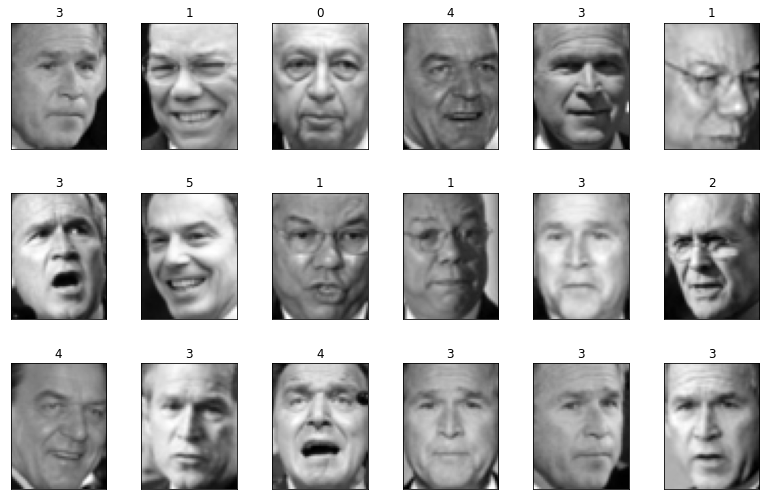

In [2]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
plot_gallery(X, list(y), h, w, n_row=3, n_col=6)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Estadisticas de los datos:")
print(f"Numero de datos de entrenamiento: {X_train.shape[0]}")
print(f"Numero de datos de test: {X_test.shape[0]}")

Estadisticas de los datos:
Numero de datos de entrenamiento: 973
Numero de datos de test: 244


In [5]:
# PCA

n_components = 150

t0 = time()

# Paso 1: hacer la media del conjunto de datos de entrenamiento
X_train_mean = np.mean(X_train, axis=0)


# Paso 2: estandarizar el conjunto de datos de entrenamiento
X_norm = X_train - X_train_mean


# Paso 3: calcular la nueva matriz de covarianzas del conjunto de datos estandarizados
X_train_cov = np.cov(X_norm, rowvar=False)



# Paso 4: calcular la descomposición espectral de la matriz de covarianzas
u, autoval, autovec = np.linalg.svd(X_train_cov, full_matrices=False) # tarda 68.246s


# Paso 5: construir la matriz de proyección A seleccionando las n_componentes componentes principales
A = autovec[:n_components]

# Paso 6: proyectar el conjunto de datos de entrenamiento estandarizado sobre el nuevo espacio
X_train_pca = (A @ X_train.T).T

# Paso 7: proyectar el conjunto de datos de test sobre el nuevo espacio:
X_test_pca = (A @ (X_test - np.mean(X_test, axis=0)).T).T



print(
    "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0])
)

#pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)

"""
print("pca_comps: ",pca.components_.shape)
print("eigenns ",eigenfaces.shape)
print("X_final:", X_train_final.shape)
print("X_test_final:", X_test_final.shape)
print("A:", A.shape)
print("Autoval:", autoval.shape)
print("Autovec:", autovec.shape)
print("u:", u.shape)
print("X_norm:", X_norm.shape)
print("X_cov:", X_train_cov.shape)

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))
"""

#eigenfaces1 = pca.components_.reshape((n_components, h, w))
#print("eigen1: ",eigenfaces1)
eigenfaces2 = A.reshape((n_components,h,w))

print("listo")
print("done in %0.3fs" % (time() - t0))

"""
print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))
"""


Extracting the top 150 eigenfaces from 973 faces
listo
done in 15.768s


'\nprint("Projecting the input data on the eigenfaces orthonormal basis")\nt0 = time()\nX_train_pca = pca.transform(X_train)\nX_test_pca = pca.transform(X_test)\nprint("done in %0.3fs" % (time() - t0))\n'

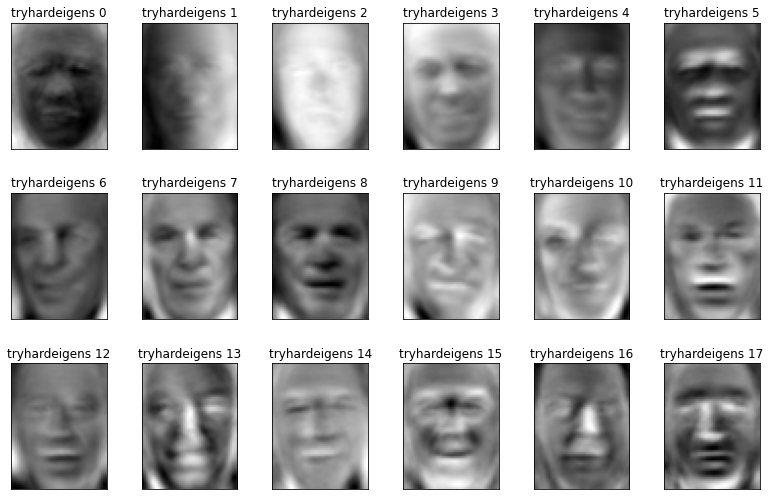

In [6]:

#eigenface_titles1 = ["eigenface PCA %d" % i for i in range(eigenfaces1.shape[0])]
#plot_gallery(eigenfaces1, eigenface_titles1, h, w, n_row=3, n_col=6)
#plt.show()

eigenface_titles2 = ["tryhardeigens %d" % i for i in range(eigenfaces2.shape[0])]
plot_gallery(eigenfaces2, eigenface_titles2, h, w, n_row=3, n_col=6)
plt.show()

Predicting people's names on the test set
done in 1.273s
y_test: (244,)
y_pred: (244,)
                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00         8
     Colin Powell       0.30      0.23      0.26        61
  Donald Rumsfeld       0.17      0.12      0.14        26
    George W Bush       0.44      0.46      0.45       103
Gerhard Schroeder       0.00      0.00      0.00        18
       Tony Blair       0.15      0.14      0.15        28

         accuracy                           0.28       244
        macro avg       0.17      0.16      0.16       244
     weighted avg       0.29      0.28      0.28       244

[[ 0  1  1  4  1  1]
 [ 2 14  4 28  7  6]
 [ 1  3  3 12  4  3]
 [10 22  3 47 11 10]
 [ 2  3  2  8  0  3]
 [ 2  4  5  9  4  4]]


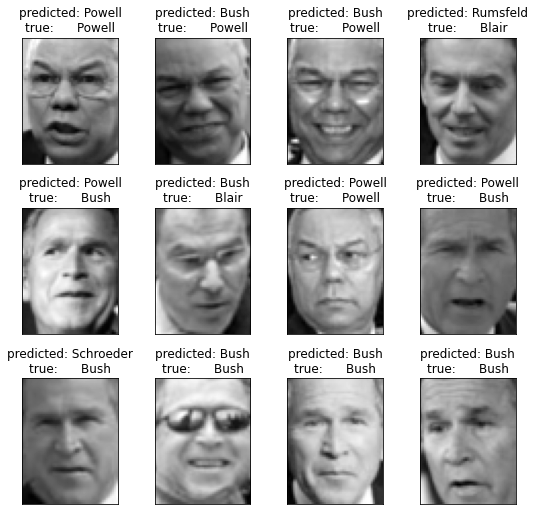

In [13]:
print("Predicting people's names on the test set")
t0 = time()
clf = ClassifEstadisticoRegularizado_metodo_sklearn(np.unique(y_train))
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("done in %0.3fs" % (time() - t0))

print("y_test:", y_test.shape)
print("y_pred:", y_pred.shape)


print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(" ", 1)[-1]
    true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
    return "predicted: %s\ntrue:      %s" % (pred_name, true_name)
prediction_titles = [title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])]
plot_gallery(X_test, prediction_titles, h, w)